# Disease Prediction Using ML Algorithms


Dataset Sample:
   age  sex  chest pain type  resting bps  cholesterol  fasting blood sugar  \
0   40    1                2          140          289                    0   
1   49    0                3          160          180                    0   
2   37    1                2          130          283                    0   
3   48    0                4          138          214                    0   
4   54    1                3          150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


Missing Values:
 age                    0
sex

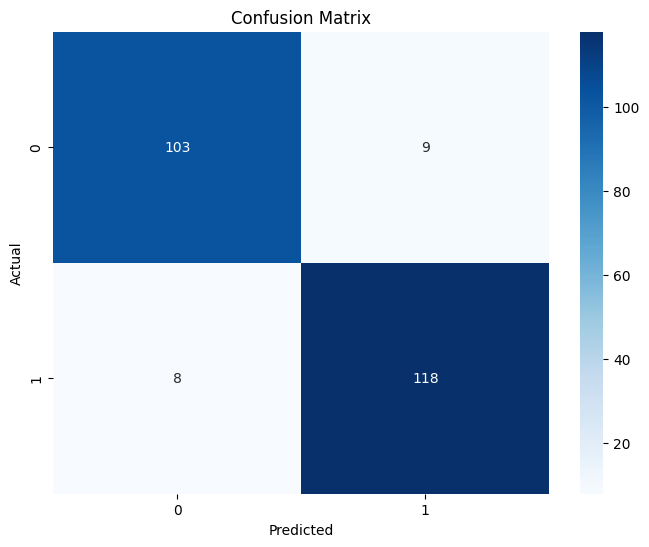

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# Step 1: Load Dataset
df = pd.read_csv('heart_disease.csv')

# Displaying 1st five rows
print("Dataset Sample:")
print(df.head())


# Step 2: Data Preprocessing
print("\n\nMissing Values:\n",df.isnull().sum())

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

X = pd.DataFrame(scaled_features, columns = df.columns[:-1])
y = df['target']


# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify =y)


# Step 4: Train Multiple ML models
# 1. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)
print(f"\n\nLogistic Regression Accuracy: {log_accuracy:.2f}")

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


# Step 5: Evaluate the Best Model
best_model = rf_model if rf_accuracy > log_accuracy else log_model
best_preds = rf_preds if rf_accuracy > log_accuracy else log_preds

print("\n\nBest Model Metrics:")
print("\nAccuracy Score:", accuracy_score(y_test, best_preds))
print("\nClassification Report:\n", classification_report(y_test, best_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_preds))


# Step 6: Visualize the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





In [3]:
# Step 7: Making Predictions on new data
new_data  = pd.DataFrame({
    'age': [40, 39],
    'sex': [1, 0],
    'chest pain type': [2, 4],
    'resting bps': [100, 120],
    'cholesterol': [170, 239],
    'fasting blood sugar': [0, 1],
    'resting ecg': [0, 0],
    'max heart rate': [50, 80],
    'exercise angina': [0, 1],
    'oldpeak': [0.5, 1],
    'ST slope': [0, 1]
})

# Scaling new data
new_data_scaled = scaler.transform(new_data)

# Making predictions
predictions = best_model.predict(new_data_scaled)

# Output predictions
for i, prediction in enumerate(predictions):
    result = "At Risk of Heart Disease!" if prediction == 1 else "No Heart Disease..."
    print(f"\nPrediction for New Data Row {i+1}: {result}")






Prediction for New Data Row 1: No Heart Disease...

Prediction for New Data Row 2: At Risk of Heart Disease!


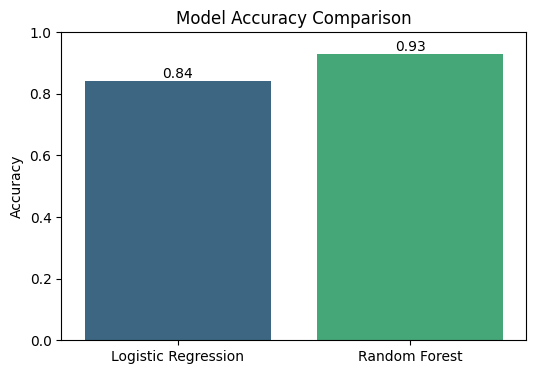

In [4]:
# Step 8: Visualize Model Comparison
models = ['Logistic Regression', 'Random Forest']
accuracies = [log_accuracy, rf_accuracy]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')
plt.show()